# Machine Learning 45: Principal Component Analysis (PCA)

## **1. Introduction**

### **What is PCA?**

**Principal Component Analysis (PCA)** is a **dimensionality reduction technique** used in machine learning and data science. It transforms high-dimensional data into a lower-dimensional space while **preserving as much variance (information)** as possible.

* “Principal components” are new axes along which the data varies the most.
* PCA is **unsupervised**, meaning it does not use labels (y-values) of the data.

**Intuition:**
Imagine you have 3D data (like points in space). Most of the points lie on a plane. PCA finds that plane and projects the data onto it—reducing the dimensionality from 3D → 2D while keeping most of the information.


### **Why is PCA used?**

1. **Dimensionality reduction:** Reduce the number of features while keeping important information.
2. **Noise reduction:** Removes small variations in data that are not important.
3. **Visualization:** Reduce high-dimensional data to 2D or 3D for plotting.
4. **Feature extraction:** Helps machine learning models focus on meaningful patterns.


### **Difference from other dimensionality reduction techniques**

| Technique                          | Type                     | Difference from PCA                                                  |
| ---------------------------------- | ------------------------ | -------------------------------------------------------------------- |
| PCA                                | Linear, unsupervised     | Finds axes with maximum variance. Assumes linear relationships.      |
| LDA (Linear Discriminant Analysis) | Linear, supervised       | Focuses on maximizing class separability, uses labels.               |
| t-SNE                              | Non-linear, unsupervised | Captures complex non-linear relationships, mainly for visualization. |
| Autoencoders                       | Non-linear, unsupervised | Neural network-based, can learn non-linear transformations.          |


## **2. Mathematical Foundation**

### **Variance and Covariance**

* **Variance:** Measures how spread out a single variable is.
$$ \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

* **Covariance:** Measures how two variables change together.
$$ \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

  * Positive covariance: Variables increase together.
  * Negative covariance: One increases, other decreases.

The **covariance matrix** summarizes covariances between all pairs of features.


### **Eigenvectors and Eigenvalues**

* **Eigenvectors:** Directions of maximum variance (principal components).
* **Eigenvalues:** Magnitude of variance along each eigenvector.

> PCA finds eigenvectors of the covariance matrix. The eigenvectors with the **largest eigenvalues** represent directions along which the data varies the most.


### **Concept of Principal Components**

* **1st principal component (PC1):** Direction of maximum variance.
* **2nd principal component (PC2):** Direction of maximum remaining variance, orthogonal to PC1.
* And so on…

> Principal components are **new axes** to represent the data efficiently.


### **Projecting data onto new axes**

Once we have principal components, we **project the original data** onto these axes:

$$ \text{Projected data} = \text{Original data} \times \text{Eigenvectors} $$

This gives a transformed dataset in a lower-dimensional space.


## **3. Steps of PCA**

### **Step 1: Standardization**

* Scale features to have **mean = 0** and **variance = 1**.
* PCA is sensitive to scale.

$$ X_{\text{scaled}} = \frac{X - \mu}{\sigma}$$


### **Step 2: Compute Covariance Matrix**

For standardized data 𝑋:
$$ \text{Cov}(X) = \frac{1}{n-1} X^T X$$

This shows how features are correlated.


### **Step 3: Eigen Decomposition**

* Compute **eigenvalues** and **eigenvectors** of the covariance matrix.
* Sort eigenvectors by descending eigenvalues.


### **Step 4: Select Top Principal Components**

* Choose top (k) eigenvectors that explain most variance.
* Example: Select 2 components for 2D visualization.


### **Step 5: Transform the Data**

$$ X_{\text{PCA}} = X \cdot W $$
Where (W) is the matrix of selected eigenvectors.

The data is now in the **reduced dimensional space**.


## **4. Applications of PCA**

1. **Dimensionality reduction for visualization**: Plot 2D/3D graphs of high-dimensional data.
2. **Noise reduction**: Remove less important features.
3. **Feature extraction for machine learning**: Improves model performance by focusing on main components.


## **5. Example: Step-by-Step PCA**

Suppose we have a small dataset:

| X | Y |
| - | - |
| 2 | 0 |
| 0 | 1 |
| 1 | 3 |
| 4 | 5 |

**Step 1:** Standardize data

* Subtract mean, divide by standard deviation.

**Step 2:** Compute covariance matrix
$$
\text{Cov} =
\begin{bmatrix}
1.666 & 1.833 \\
1.833 & 2.916
\end{bmatrix}
$$

**Step 3:** Eigen decomposition

* Eigenvalues: 4.0, 0.583
* Eigenvectors:

$$
\begin{bmatrix}
0.57 & -0.82 \\
0.82 & 0.57
\end{bmatrix}
$$

**Step 4:** Select top component(s)

* PC1 explains most variance (eigenvalue = 4.0).

**Step 5:** Project data

* Multiply standardized data by eigenvectors → transformed data.


## **6. Interpretation**

### **Explained Variance Ratio**

$$ \text{Explained Variance Ratio} = \frac{\text{Eigenvalue of PC}}{\text{Sum of all eigenvalues}}$$

* Helps decide **number of components** to keep.

### **Choosing the number of components**

* Usually keep enough components to explain **~95% of variance**.
* Scree plot helps visualize this.


## **7. Limitations of PCA**

1. **Assumes linearity**: PCA works best for linearly correlated features.
2. **Sensitive to scale**: Standardization is required.
3. **Not suitable for categorical features**: PCA is only for numerical data.
4. **Hard to interpret**: PCs are combinations of original features, not always intuitive.


✅ **Summary:**
PCA reduces dimensions, captures most variance, removes noise, and helps in visualization and feature extraction. It’s powerful but works best on numerical and linearly correlated data.



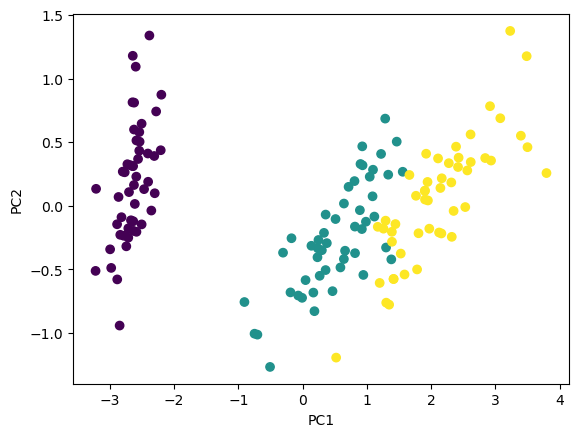

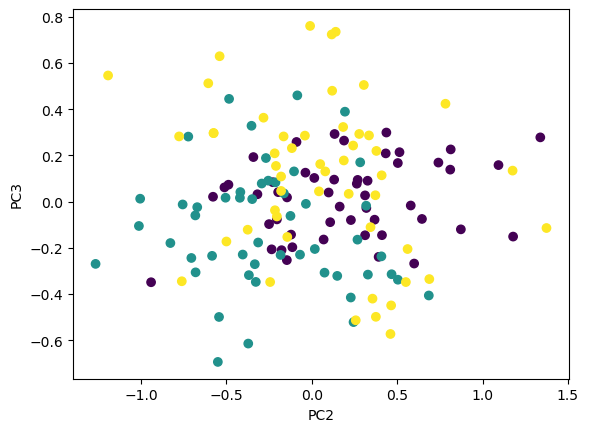

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions
pca = PCA(n_components=3)

# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)

# Now we can plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()


# DO PCA on TIPs dataset?

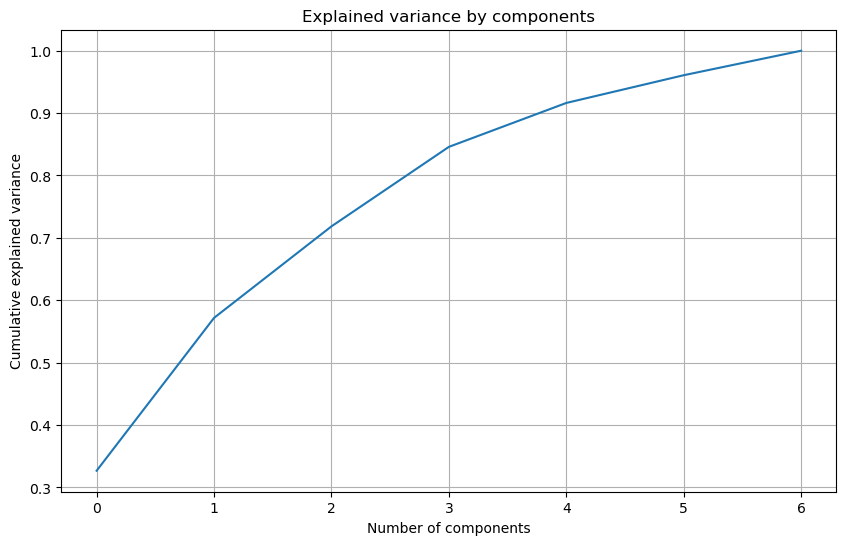

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756 -0.058183  0.378659   
tip         0.531650  0.178333  0.159316 -0.010375 -0.637807 -0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364  0.000506 -0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763  0.212334  0.111732   
day        -0.156579  0.660434 -0.047053  0.229846  0.003218  0.606759   
time       -0.281249  0.556479  0.266919  0.297170 -0.004329 -0.572115   
size        0.493317  0.261729 -0.055523 -0.148236  0.738039 -0.245190   

                 PC7  
total_bill  0.686390  
tip        -0.421978  
sex         0.007162  
smoker     -0.228151  
day        -0.340735  
time        0.352618  
size       -0.241370  


In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the data
tips = sns.load_dataset('tips')
 
# preporcessing
# encode categorical data 

le = LabelEncoder()
cat_features = tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features])

# standardize the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

# apply PCA

pca = PCA()
X_pca = pca.fit_transform(tips_scaled)

# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)


<Axes: xlabel='PC1', ylabel='PC2'>

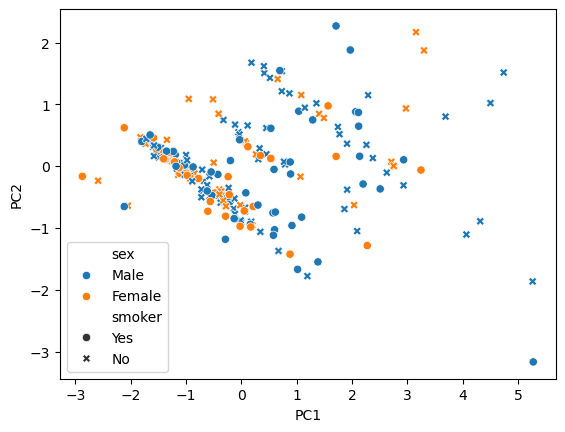

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')


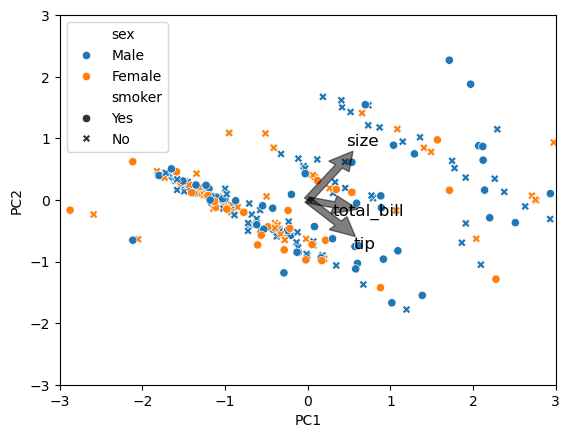

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()
